In [97]:
import tensorflow as tf
import matplotlib.patches as patches
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont

In [68]:
class Model():
    def __init__(self):

        self.model= tf.keras.models.load_model('saved_models/model_main3_imagenet_augm.h5')   
    
    def predict(self, image):
        
        emotions = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'uncertain']
        preds = self.model.predict(image) 
        emotion = emotions[np.argmax(preds)]
    
        return emotion

In [30]:
def resize(img, new_size):
    img = Image.fromarray(img)
    img = img.resize(new_size)
    return np.array(img)

In [8]:
def detect_face(inp):
    """детекция лица на кадре"""
    
    # иницилизируем детектор:
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    grayscale_image = cv2.cvtColor(inp, cv2.COLOR_BGR2GRAY)
    # получаем координаты углов
    faces = face_detector.detectMultiScale(grayscale_image, 1.3, 5)
    
    return faces

In [71]:
def preprocess_image(img, bbox):
    """обработка изображения для передачи в сеть"""

    x = bbox[0][0]
    y = bbox[0][1]
    w = bbox[0][2]
    h = bbox[0][3]
    
    img = img[y:y + h, x:x + w]
#     img = img.crop((x, y, x+w, y+h))    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = resize(img, (224, 224))
    img = img.astype(np.float32)/255.
    img = np.reshape(img, (224, 224, 3))
    img = np.expand_dims(img, axis=0)
    
    return img    

In [120]:
def visualize(img, bbox, emotion ):
    """визулизируем кадр с детектированным лицом и предсказанной эмоцией"""
    
    fig,ax = plt.subplots(1)
    ax.imshow(img.astype('uint8'))
    cat = emotion
    rx, ry, rw, rh = bbox[0][0],  bbox[0][1],  bbox[0][2],  bbox[0][3]

    rect = patches.Rectangle((rx, ry), rw, rh, linewidth=2, edgecolor='y', facecolor='none')
    ax.add_patch(rect)
    
    font = ImageFont.truetype('arial.ttf', 25)
    size = font.getsize(cat)
    rect = patches.Rectangle((rx, ry), size[0]+5, -size[1]-5, linewidth=1, edgecolor='y', facecolor='y')
    ax.add_patch(rect)
    ax.text(rx+2, ry-2, cat)

In [145]:
# Запускаем камеру
cam = cv2.VideoCapture(0)

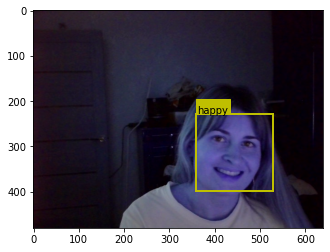

In [150]:
if not cam.isOpened():
    print("Не удалось открыть камеру")
else:
    # считываем кадры
    ret, frame = cam.read()
    if ret == True:
        # детектируем лицо
        bbox = detect_face(frame)
        if len(bbox) != 0:
                  
            # обработка изображения для подачи в сеть
            img = preprocess_image(frame, bbox)

            # инициализируем экземпляр сети
            model = Model()
            # получаем предсказание
            emotion = model.predict(img)

            # визуализируем
            visualize(frame, bbox, emotion)
        else:
            print ("Лицо на фото не детектировано")
                                         

In [151]:
# Остановить камеру
cam.release()